<a href="https://colab.research.google.com/github/perezm-496/AI4MedImg/blob/main/004_Nesterov_DataLoader_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST dataset

import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 64

transform=transforms.Compose([
        transforms.ToTensor(), # Tensor
        transforms.Normalize((0.1307,), # media
                             (0.3081,) # std
                             ) 
        ])

dataset = torchvision.datasets.MNIST('./',
                                     train=True,
                                     download=True,
                                     transform=transform)


5
torch.Size([1, 28, 28])
60000


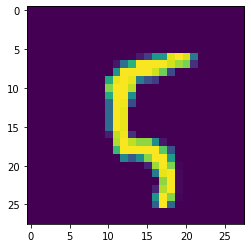

In [ ]:
import matplotlib.pyplot as plt

img0, t = dataset[100]
print(t)
print(img0.shape)
img0 = img0.numpy().reshape(28, 28)
plt.imshow(img0)
print(len(dataset))

In [ ]:
# encargado de los batchs
trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

# Modelo
mdl = torch.nn.Sequential( torch.nn.Flatten(),
                           torch.nn.Linear(28*28, 1024),
                           torch.nn.ReLU(),
                           torch.nn.Linear(1024, 10),
                           torch.nn.Softmax()
                           )

criterion = torch.nn.Ca

optimizer = torch.optim.SGD(mdl.parameters(),
                           lr = 0.1,
                           momentum = 0.9)

# Single training epoch done in batchs.
epoch_loss = 0
for x, t in iter(trainloader):
    optimizer.zero_grad()

    y = mdl(x)
    loss = criterion(y, t)
    loss.backward()
    optimizer.step()

    epoch_loss += loss.detach().item()

print("Loss value in this epoch: {}".format(
    epoch_loss
))

# Test the result of training on test

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

test_dataset = torchvision.datasets.MNIST('./',
                                     train=False,
                                     download=True,
                                     transform=transform)

test_loader = torch.utils.data.DataLoader(dataset, 
                batch_size=batch_size,
                shuffle=True,
                num_workers=2)

epoch_acc = 0
for x, t in iter(test_loader):
    y = mdl(x) # Logit
    pred = torch.argmax(y)
    acc = torch.sum(pred == t)
    epoch_acc += acc.item()

print("Acc on test dataset: {}".format(epoch_acc/len(test_dataset)))

Loss value in this epoch: nan
Acc on test dataset: 0.5923


In [ ]:
def train_epoch(mdl, criterion, optimizer, dataloader):
    epoch_loss = 0
    for x, t in iter(trainloader):
        optimizer.zero_grad()

        y = mdl(x)
        loss = criterion(y, t)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.detach().item()

    return epoch_loss

def compute_acc(mdl, dataloader):
    epoch_acc = 0
    for x, t in iter(test_loader):
        y = mdl(x) # Logit
        pred = torch.argmax(y)
        acc = torch.sum(pred == t)
        epoch_acc += acc.item()
    return epoch_acc


In [ ]:
total_epochs = 100
loss_list = [ ]
acc_list = [ ]
for epoch in range(total_epochs):
    epoch_loss = train_epoch(
        mdl,
        criterion,
        optimizer,
        trainloader
    )
    loss_list.append(epoch_loss)
    if (epoch+1)%10 == 0:
        # Test every 10 epochs
        epoch_acc = compute_acc(
            mdl,
            trainloader
        )
        acc_list.append(epoch_acc)

print(loss_list)
print(epoch_acc)

KeyboardInterrupt: ignored